# Scraping and Analyzing Medium Articles

In this project I will web scrape and analyze the data pulled from the Medium archive pages related to the data science. 

Medium is an online publishing platform developed by Evan Williams, and launched in August 2012. The platform is an example of social journalism, having a hybrid collection of amateur and professional people and publications, or exclusive blogs or publishers on Medium, and is regularly regarded as a blog host. Medium platform uses the system of “claps” (formerly “recommendations”), similar to “likes” on Facebook, to up vote the best articles and stories, called the Tag system, and divides the stories into different categories to let the audiences choose.

Many starting Medium authors don't know how to write an article that will potentially attract more readers. It's hard to determine what topics are most popular at the time, what article length is more acceptable, when it's better to post an article, etc. With this project I want to find out what factors may determine some articles to be more successful than others.

The goal of the project is to gain insights from the obtained data and answer the questions:
1. What distinguishes the well-received articles?
2. What were the most popular topics for the last 2 years?
3. What are the performance tendencies of the top authors?
4. Which user engagement tendencies can we notice?


### Data origin

I pulled this data from Medium's archive pages of 23 different tags. Each archive page is associated to a story-tag and is a collection of Medium timeline cards organized by date.

### The 23 scraped tags

['Data Science', 'Data Visualization', 'Data Analysis', 'Python', 'R', 'Machine Learning', 'Big Data',
        'Deep Learning', 'Data Engineering', 'Artificial Intelligence', 'Neural Networks', 'SQL', 'Data Mining', 
        'Web Scraping', 'Data Quality','Data Cleaning', 'Data Collection', 'Data Modeling', 
        'Data Storytelling', 'Software Engineering','Data Science Portfolio', 'Dashboard', 'Database']

## 1. Data cleaning

### 1.1. Handling null values

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy.stats import norm

In [3]:
data = pd.read_csv('medium_articles_2022.csv')

In [4]:
data

,title,author,claps,responses,reading time,publication,date,tag
0,Translating SQL Queries to Pandas Operations,Avi Chawla,298,11,6,Towards Data Science,2022-07-03,data-science
1,Looking for a Database for your next system de...,i.vikas,93,1,8,NaN,2022-07-03,data-science
2,How to Design and Build a Data Platform,Filipe Rigueiro,239,2,9,Product Coalition,2022-07-03,data-science
3,Data Warehouse vs. Data Mart vs. Data Lake,Christianlauer,83,0,3,CodeX,2022-07-03,data-science
4,3 steps for Building Airflow Pipelines with Ef...,Vachan Anand,58,0,7,Towards Data Science,2022-07-03,data-science
...,...,...,...,...,...,...,...,...
67628,Jugadores Más Vistos del Día — 28/09/2022,Todo por el Fútbol,0,0,1,NaN,2022-09-28,database
67629,Últimos Jugadores Actualizados — 28/09/2022,Todo por el Fútbol,0,0,1,NaN,2022-09-28,database
67630,Jogadores Mais Vistos do Dia — 28/09/2022,Tudo pelo Futebol,0,0,1,NaN,2022-09-28,database
67631,"Clean Your Email List, Know-How?",Neel S,37,0,7,NaN,2022-09-28,database


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67633 entries, 0 to 67632
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         67633 non-null  object
 1   author        67623 non-null  object
 2   claps         67633 non-null  int64 
 3   responses     67633 non-null  int64 
 4   reading time  67633 non-null  int64 
 5   publication   22618 non-null  object
 6   date          67633 non-null  object
 7   tag           67633 non-null  object
dtypes: int64(3), object(5)
memory usage: 4.1+ MB


Looks like the scraper appended all elements correctly and we don't have any missing data, except for the 'publication' column, but it is fine, since not all authors write for publications. However, let's check the "reading_time" column if it has any inaproppriate values.

In [7]:
data["reading time"].value_counts()

3      12624
4      10821
5       8969
2       8638
6       6215
7       4470
1       4315
8       3285
9       2217
10      1639
11      1042
0        709
12       707
13       482
14       357
15       274
16       177
17       130
18        98
19        86
20        77
21        50
22        48
23        30
24        23
25        22
27        20
26        15
32        14
30        13
28        11
31         9
34         6
29         5
41         4
38         4
36         3
44         3
35         3
42         3
46         2
53         2
40         2
50         1
243        1
54         1
49         1
47         1
39         1
58         1
60         1
43         1
Name: reading time, dtype: int64

We have a plenty of zero values, but the reading time on Medium can not be equal to zero, unless it's an article with a couple of sentences. I would like not to consider such articles in the analysis, since they are mostly not-serious or made accidentaly by authors. 

In [8]:
data.drop(data.loc[data['reading time']==0].index, inplace=True)

### 1.2. Handling duplicates

In [9]:
duplicates = data[data.duplicated(keep=False)]


In [10]:
duplicates

,title,author,claps,responses,reading time,publication,date,tag
259,10 SQL Queries You Should Know as a Data Scien...,Uğur Savcı,1930,33,6,SelectFrom,2022-03-09,data-science
260,138 Data Science Projects You Can Try with Python,Aman Kharwal,522,1,4,Python in Plain English,2022-03-09,data-science
261,11 Books Every Data Scientist Must Read,Zuzanna Sieja,1100,17,8,DLabs.AI,2022-03-09,data-science
262,Best of Both Worlds: Automated and Dynamic SQL...,Kat Li,213,4,4,Towards Data Science,2022-03-08,data-science
263,5 Window Function Examples to Take Your SQL Sk...,Andreas Martinson,182,0,6,Towards Data Science,2022-03-09,data-science
...,...,...,...,...,...,...,...,...
67521,LEARN DATA ANALYSIS WITH SQL QUERIES,John Bassey,71,0,5,NaN,2022-10-02,database
67522,Data Science: Non profits organization Project,Ariane Saliani,0,0,1,NaN,2022-10-01,database
67523,Últimos Jogadores Atualizados — 02/10/2022,Tudo pelo Futebol,0,0,1,NaN,2022-10-02,database
67524,Últimos Jugadores Actualizados — 02/10/2022,Todo por el Fútbol,0,0,1,NaN,2022-10-02,database


An article on Medium.com can have several tags assosiated with it. It means, that some articles could appear several times in our data and only be marked with different tags. 

I will delete repeating articles and store all the tags related to the original article in the 'tag' column.

In [11]:
grouped = data.groupby(['title', 'author'])
data = grouped.first().reset_index()

for name, group in grouped:
    # Check if there are more than one duplicate
    if len(group) > 1:
        # Get a list of the tags for the duplicates
        group_tags = group['tag'].tolist()
        # Create a set of the tags to get only unique tags
        unique_tags = set(group_tags)
        # Check if there are multiple unique tags for the duplicates
        if len(unique_tags) > 1:
            # Update the original entry's tag with a string of the unique tags separated by ', '
            data.loc[(data['title'] == name[0]) & (data['author'] == name[1]), 'tag'] = ', '.join(unique_tags)
    
    

In [12]:
data

,title,author,claps,responses,reading time,publication,date,tag
0,# 1 Python — String Interpolation,Anupamkumar Brahma,0,0,2,None,2022-09-03,python
1,# 2 Rosalind Problems — Bioinformatics Strongh...,Daniel Pintard,1,0,4,None,2022-09-08,python
2,"# Series 11 Python Arrays, Classes & Inheritance",Keren Melinda,2,0,6,None,2022-11-20,python
3,"#001: The Week In Stories — Tech Salaries, Fre...",Aphinya Dechalert,106,0,5,matcha.fyi,2022-01-31,software-engineering
4,"#003: The Week In Stories — React, Supabase, N...",Aphinya Dechalert,21,1,6,matcha.fyi,2022-02-14,software-engineering
...,...,...,...,...,...,...,...,...
49102,🧙🏼‍♂️ Lore AI Newsletter #3,Nathan Lands,37,0,6,None,2022-11-02,artificial-intelligence
49103,🧙🏼‍♂️ This Week in Generative AI #2,Nathan Lands,46,0,8,None,2022-10-26,data-science
49104,🧪 How to test ML models? (1/n),Giskard,8,0,2,None,2022-03-24,machine-learning
49105,🧬 Intro to genetic algorithms with python,Amine Ziad Ounnoughene,11,1,5,None,2022-01-06,machine-learning


Now our dataset is cleaned, without null values (we leave the 'publication' column as it is) and duplicates. The last thing I'll do here, is changing the 'date' column to datetime type and renaming the 'reading time' column.

In [13]:
data["date"] = pd.to_datetime(data["date"])
data.rename(columns = {'reading time':'reading_time'}, inplace = True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49107 entries, 0 to 49106
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         49107 non-null  object        
 1   author        49107 non-null  object        
 2   claps         49107 non-null  int64         
 3   responses     49107 non-null  int64         
 4   reading_time  49107 non-null  int64         
 5   publication   16166 non-null  object        
 6   date          49107 non-null  datetime64[ns]
 7   tag           49107 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 3.0+ MB


## 2. Articles Analysis

Before we dig into more specific analysis, let's firt look at some general information: 

- How long are most Medium articles?
- How many claps and responses do Medium articles receive?

### 2.1. How long are most Medium articles?

I found that the majority of articles are relatively short, with a median reading time of 2-5 minutes. This  is somewhat surprising, for me because I read articles that are 8-10 minutes long.

The findings suggests that many Medium readers prefer shorter articles. However, it's important to note that this dataset may not be representative of all Medium articles, as it only includes articles from a specific time frame and topic area.

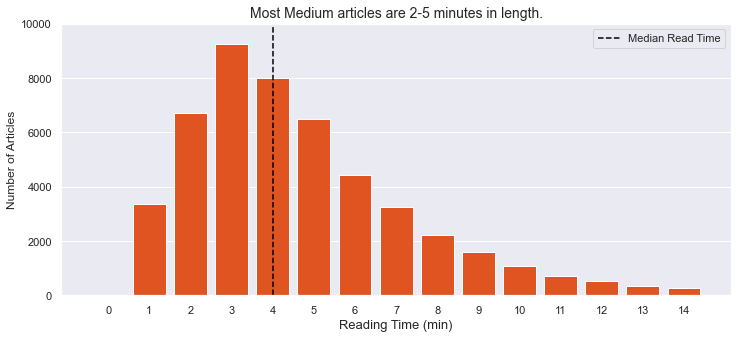

In [392]:
reads=[]
entries = []
for x in range(15):
    reads.append(x)
    entries.append(data[data.reading_time==x].shape[0])

plt.figure(figsize=(12,5))
sns.barplot(x=reads, y=entries, color="orangered")
plt.vlines(data.reading_time.median(),0,190000,
           color="black",
           linestyle="dashed",
           label="Median Read Time")
plt.title("Most Medium articles are 2-5 minutes in length.", fontsize=14)
plt.yticks([0,2000,4000, 6000, 8000, 10000], ["0","2000", "4000", "6000", "8000", "10000"])
plt.ylim(0,10000)
plt.ylabel("Number of Articles")
plt.xlabel("Reading Time (min)", fontsize=13)
plt.legend()

plt.show()

### 2.2. How many claps and responses do Medium articles receive?

Here we see, that most articles recieve really few claps(up to 20 claps) as well as responses(almost all articles receive from 0 to 3 responses), which indicates pretty poor user engagement. However, there are also a significant number of articles that perform exceptionally well, with the highest recorded number of claps at 38,000 and 160 responses.

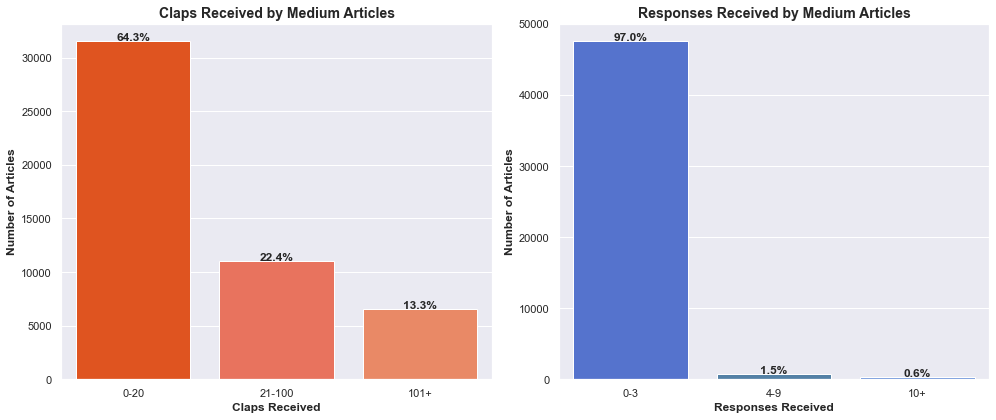

In [418]:
article_counts = data.shape[0]
twenty = data[data.claps<21].shape[0]
hundred = data[(data.claps > 20) & (data.claps < 101)].shape[0]
more = data.shape[0] - twenty - hundred

one_three = data[data.responses < 4].shape[0]
four_ten = data[(data.responses > 4 ) & (data.responses < 11)].shape[0]
more_responses = data[data.responses > 10].shape[0]

colors = ["#ff4500", "#ff6347", "#ff7f50"]
colors_2 = ["#4169e1", "#4682b4", "#6495ed"]

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,6))
#Plot for claps
sns.barplot(x=["0-20", "21-100", "101+"],
            y=[twenty, hundred, more], palette=colors, ax=ax1)
ax1.set_xlabel("Claps Received", fontweight="bold", fontsize=12)
ax1.set_ylabel("Number of Articles", fontweight="bold", fontsize=12)
ax1.set_title("Claps Received by Medium Articles", fontweight="bold", fontsize=14)
for i in range(3):
    height = ax1.patches[i].get_height()
    ax1.text(ax1.patches[i].get_x() + ax1.patches[i].get_width()/2,
             height + 50,
             f'{(height/data.shape[0])*100:.1f}%',
             ha="center", fontweight="bold", fontsize=12)

# Plot for responses received
sns.barplot(x=["0-3", "4-9", "10+"],
            y=[one_three, four_ten, more_responses], palette=colors_2, ax=ax2)
ax2.set_xlabel("Responses Received", fontweight="bold", fontsize=12)
ax2.set_ylabel("Number of Articles", fontweight="bold", fontsize=12)
ax2.set_title("Responses Received by Medium Articles", fontweight="bold", fontsize=14)
for i in range(3):
    height = ax2.patches[i].get_height()
    ax2.text(ax2.patches[i].get_x() + ax2.patches[i].get_width()/2,
             height + 50,
             f'{(height/data.shape[0])*100:.1f}%',
             ha="center", fontweight="bold", fontsize=12)

plt.tight_layout()
plt.show()


## 3. Tags Analysis

In this section, we will explore the tags associated with Medium articles. Tags are user-generated labels that provide information about the content of the article. By analyzing the distribution of tags, we can gain insights into the topics that are popular among Medium users. This analysis can help content creators to better understand the interests and preferences of their target audience and create content that resonates with them.


### 3.1. The most popular tags

As we see, the majority of scraped articles belong to the 4 tags:
1. Data Science
2. Machine Learning
3. Python
4. Artificial Intelligence

The tag "Data Science Portfolio" is unnoticable on the plot, since it has only 7 articles.

Text(0.5, 1.0, 'Number of Articles for Each Tag')

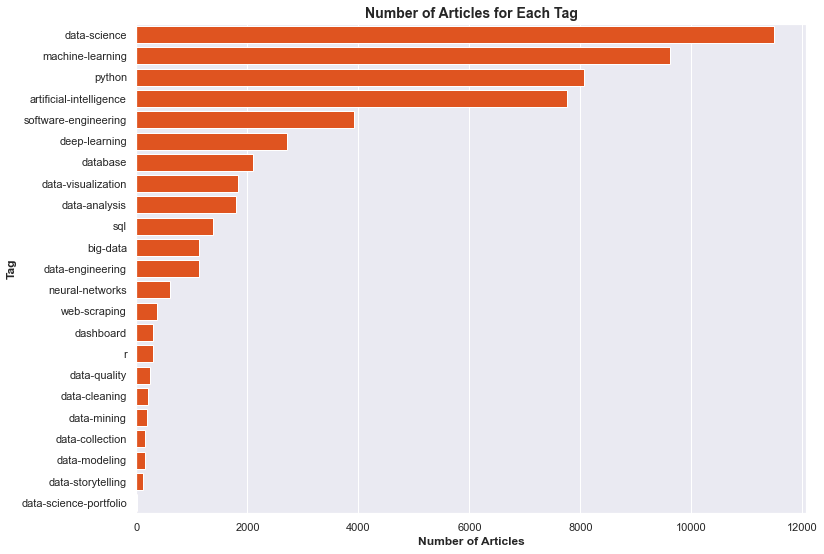

In [15]:
sns.set_theme()
separate_tags = []

for index, row in data.iterrows():
    # Checking if the tag is a combined tag
    if ', ' in row['tag']:
            # Split the combined tag into separate tags
        tags = row['tag'].split(', ')
            # Add the separate tags to the list
        separate_tags.extend(tags)
    else:
        # Add the single tag to the list
        separate_tags.append(row['tag'])
# Count the number of occurrences of each separate tag
tag_counts = pd.Series(separate_tags).value_counts()

fig, ax = plt.subplots(figsize=(12, 9))
sns.barplot(x=tag_counts.values, y=tag_counts.index, ax=ax, color='orangered')
ax.set_ylabel('Tag', fontweight ="bold", fontsize=12)
ax.set_xlabel('Number of Articles', fontweight ="bold", fontsize=12)
ax.set_title('Number of Articles for Each Tag', fontweight ="bold", fontsize=14)
    

### 3.2. The longest and shortest reading time by tag

The following plot showcases the median read time for each tag. This metric indicates the number of minutes that most articles in a particular tag take to read. As shown in the plot, the majority of tags have a consistent median read time of 4 minutes. However, the "database" tag stands out as having shorter median read time compared to the other tags.


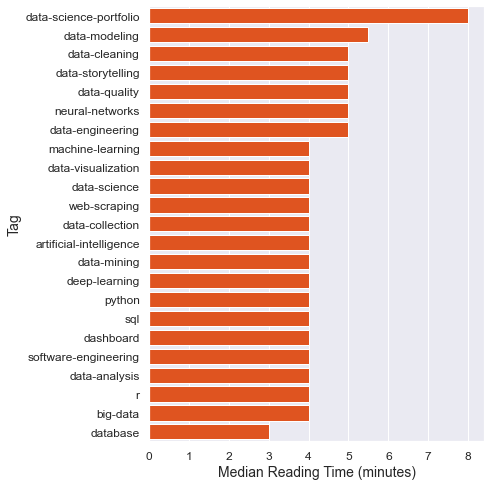

In [424]:
unique_tags = set()

# # Add the tags to the set of unique tags
for tag in separate_tags:
    unique_tags.add(tag)
    
unique_tags = list(unique_tags)

# Create an empty dictionary to store the median reading times for each tag
median_read_times = {}

# Filter the dataframe to include only rows with the current tag
for tag in unique_tags:
    filtered_df = data[data["tag"].str.contains(tag)]
    # Calculate the median reading time for the filtered dataframe and add it to the dictionary
    median_time = filtered_df["reading_time"].median()
    median_read_times[tag] = median_time

# Sort the dictionary of tags and median reading times by median reading time value
sorted_tags = [k for k, v in sorted(median_read_times.items(), key=lambda item: item[1], reverse=True)]
sorted_median_read_times = [v for k, v in sorted(median_read_times.items(), key=lambda item: item[1], reverse=True)]

fig, ax = plt.subplots(figsize=(6, 8))
ax = sns.barplot(x=sorted_median_read_times, y=sorted_tags, color='orangered')
ax.set_xlabel("Median Reading Time (minutes)", fontsize=14)
ax.set_ylabel("Tag", fontsize=14)
ax.tick_params(axis='both', labelsize=12)
plt.show()


### 3.3. Is there any tags that recieve more claps?

Here we can see how the number of claps is spread out for each tag. 

We can observe that articles tagged with "Python", "Data Engineering", "R", "Data Science", "Machine Learning", and "Artificial Intelligence" tend to receive a higher number of claps compared to other tags. Additionally, these tags have a wider distribution of claps, with "Data Engineering", "R", and "Artificial Intelligence" displaying a significant number of outliers.

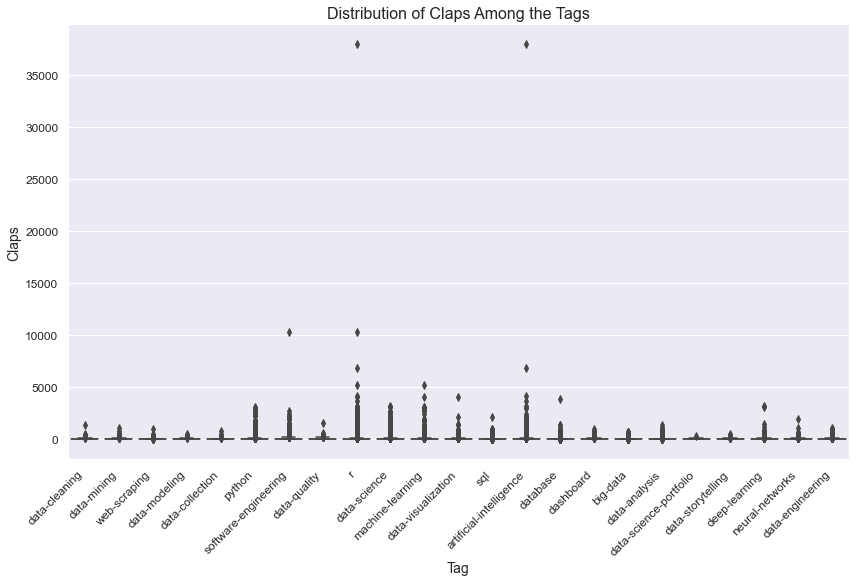

In [200]:
claps_distributions = []


for tag in unique_tags:
    filtered_df = data[data["tag"].str.contains(tag)]   
    claps = filtered_df["claps"]
    claps_distributions.append(claps)

fig, ax = plt.subplots(figsize=(14, 8))
sns.boxplot(data=claps_distributions, orient='v')
ax.set_xticklabels(unique_tags, rotation=45, ha="right", fontsize=12)
ax.set_xlabel("Tag", fontsize=14)
ax.set_ylabel("Claps", fontsize=14)
ax.tick_params(axis='both', labelsize=12)
plt.title("Distribution of Claps Among the Tags", fontsize=16)
plt.show()

We will investigate further and identify any tags that tend to receive a higher or lower number of claps generally. One way to do this is by calculating the median number of claps for each tag. Using median here instead of mean can be more robust to outliers, since median is not affected by extreme values in the same way that mean is. Therefore, the median number of claps for each tag can provide a more representative measure of the typical level of engagement for articles with that particular tag. This will give us an idea of the typical number of claps an article with a particular tag can receive

Most tags tend to receive up to 10 claps on typically, with a few exceptions. "Data Modelling", "Data Storytelling", "Data Cleaning", "Data Quality", "Data Science Portfolio", "Data Engineering", and "Software Engineering" tend to receive from 10 to 25 claps. Notably, most of these tags have a relatively low number of articles connected to them (100-500 articles), except for "Software Engineering" and "Data Engineering". "Database" tag has 0 median claps, which says that most of the articles under this tah receive 0 claps.

It is possible that the tags with fewer articles have a more targeted and specific audience that is more engaged and interested in the topics related to those tags. This can result in a higher median number of claps for those tags despite having a smaller sample size compared to the top tags with more articles. Therefore, it is important to consider both the number of articles and the median claps per tag when analyzing the popularity and engagement of tags on Medium.

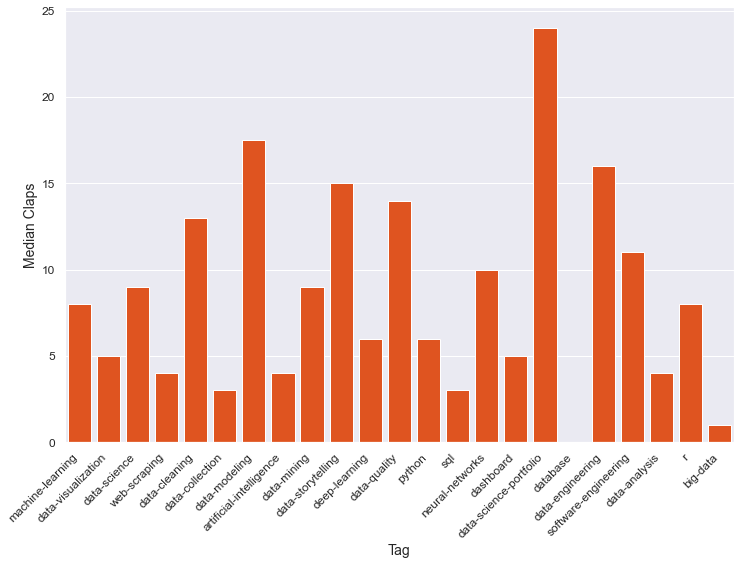

In [480]:
mean_claps = []

for tag in unique_tags:
    filtered_df = data[data["tag"].str.contains(tag)]
    mean_claps_for_tag = filtered_df['claps'].median()
    mean_claps.append(mean_claps_for_tag)

fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x=unique_tags, y=mean_claps, color='orangered')
ax.set_xticklabels(unique_tags, rotation=45, ha="right", fontsize=12)
ax.set_xlabel("Tag", fontsize=14)
ax.set_ylabel("Median Claps", fontsize=14)
ax.tick_params(axis='both', labelsize=12)
plt.show()

## 4. Analyzing the authors

Now we'll shift our focus to the authors. I want to answer such questions:

- How many stories each author has written?
- How many authors write for a publication?
- Who are the authors with the most claps?
- How many average claps per article the best authors receive?

By examining these factors, we can gain insight into the success of individual authors and their impact on the Medium platform.


We have almost 24 000 authors in our dataset. 

In [314]:
author_counts = data.author.value_counts().shape[0]
author_counts

23909

#### 4.1. How many stories did authors write?

Interesting, that the majority of authors (70.38%) wrote only 1 story during the year, and only roughly 2% of authors wrote more than 10 articles. So only around 500 authors wrote more than 10 articles in 2022.

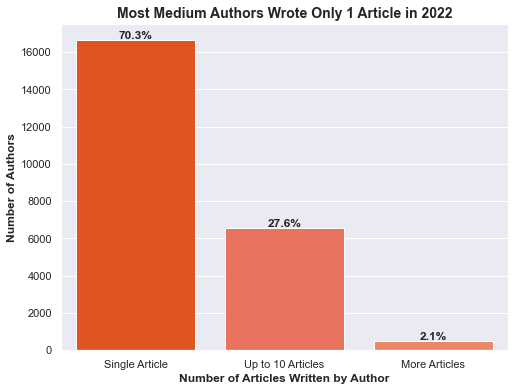

In [413]:
author_counts = data.author.value_counts()
single_article = author_counts[author_counts<2].shape[0]
up_to_50 = author_counts[(author_counts > 1) & (author_counts < 10)].shape[0]
more_articles = author_counts.shape[0] - single_article - up_to_50

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=["Single Article", "Up to 10 Articles", "More Articles"],
            y=[single_article, up_to_50, more_articles], palette=colors)

plt.xlabel("Number of Articles Written by Author", fontweight ="bold", fontsize=12)
plt.ylabel("Number of Authors", fontweight ="bold", fontsize=12)
plt.title("Most Medium Authors Wrote Only 1 Article in 2022", fontweight ="bold", fontsize=14)

for i in range(3):
    height = ax.patches[i].get_height()
    ax.text(ax.patches[i].get_x() + ax.patches[i].get_width()/2,
            height + 50,
            f'{(height/author_counts.shape[0])*100:.1f}%',
            ha="center", fontweight ="bold", fontsize=12)

plt.show()

I'll test the hypothesis that the low number of claps from the audience might be related to the number of articles the authors wrote, because it may be discouraging. 

Since the number of authors with multiple articles is relatively small compared to the number of authors with only one article, it is possible that the distribution of claps may be heavily skewed. Therefore, using the median number of claps for authors in these 3 categories may be a more appropriate metric to use for testing the hypothesis.

However, the plot shows that the median number of claps for authors with single article even higher than for the authors with more than 10 articles. Therefore, it appears that the number of claps is not the main factor that demotivates authors with only one article from writing more stories, and there may be other reasons for their lack of continued output.

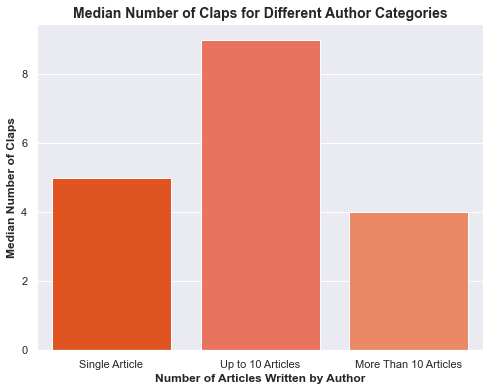

In [489]:
author_counts = data.author.value_counts()

mean_claps_single = data[data.author.isin(author_counts[author_counts == 1].index)].claps.median()
mean_claps_upto10 = data[data.author.isin(author_counts[(author_counts > 1) & (author_counts <= 10)].index)].claps.median()
mean_claps_morethan10 = data[data.author.isin(author_counts[author_counts > 10].index)].claps.median()

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=["Single Article", "Up to 10 Articles", "More Than 10 Articles"],
            y=[mean_claps_single, mean_claps_upto10, mean_claps_morethan10], palette=colors)

plt.xlabel("Number of Articles Written by Author", fontweight='bold', fontsize=12)
plt.ylabel("Median Number of Claps", fontweight='bold', fontsize=12)
plt.title("Median Number of Claps for Different Author Categories", fontweight='bold', fontsize=14)

plt.show()

#### 4.2. How many authors write for a publication?

On Medium you can find stories from both individual writers and publications. Publications generally feature stories that share a common theme.

Only 30% of authors wrote articles for a publication in 2022. There can be several reasons, why the majority of authors doesn't post in a publication.
Some authors might prefer to publish their work independently, without being affiliated with any specific publication. Others might not be interested in writing about topics that align with the themes of existing publications. Additionally, some authors might find it challenging to get their work accepted by a publication or may not know how to go about submitting their work. Lastly, some authors may simply prefer to write for personal reasons, without the goal of reaching a large audience or getting their work published in a specific publication.

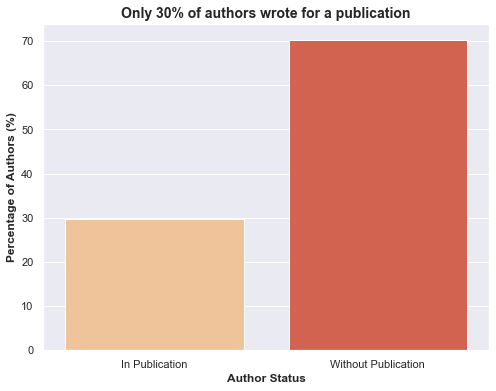

In [355]:
author_group = data.groupby('author').count()
author_group['has_written'] = author_group['publication'].apply(lambda x: 1 if x > 0 else 0)
written = author_group[author_group['has_written'] == 1].shape[0]
not_written = author_group[author_group['has_written'] == 0].shape[0]
written_percent = (written / (written + not_written)) * 100
not_written_percent = (not_written / (written + not_written)) * 100

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=["In Publication", "Without Publication"], y=[written_percent, not_written_percent], palette='OrRd')
plt.xlabel("Author Status", fontweight="bold", fontsize=12)
plt.ylabel("Percentage of Authors (%)", fontweight="bold", fontsize=12)
plt.title("Only 30% of authors wrote for a publication", fontweight="bold", fontsize=14)
plt.show()

#### 4.3. Authors with the most claps

As the data indicates, the majority of authors needed to write 20 or more articles to accumulate 10,000 or more total claps. However, there was one author who achieved the more than 35000 claps with just one article, this is known as a "one-time wonder."

Upon analyzing the top 10 authors based on their most clapped article and the total number of articles they wrote, it becomes evident that most of these authors only wrote 1-3 articles to create one highly engaging piece.

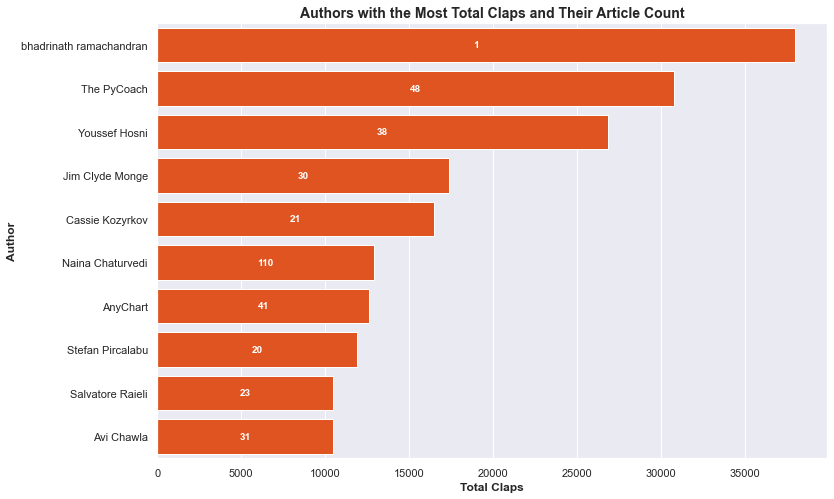

In [16]:
author_stats = data.groupby('author').agg({'claps': 'sum', 'title': 'count'})
top_authors = author_stats.nlargest(10, 'claps')
top_authors = top_authors.sort_values(by='claps', ascending=False)


fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='claps', y=top_authors.index, data=top_authors, color='orangered')

# Add article count to each bar
for i, (claps, count) in enumerate(zip(top_authors['claps'], top_authors['title'])):
    ax.text(claps/2, i, count, ha='center', va='center', color='white', fontweight='bold')

plt.xlabel("Total Claps", fontweight='bold', fontsize=12)
plt.ylabel("Author", fontweight='bold', fontsize=12)
plt.title("Authors with the Most Total Claps and Their Article Count", fontweight='bold', fontsize=14)

plt.show()

Let's explore now the relationship between an author's article count and the claps received on their most popular article. We focus on the top 10 most clapped articles and their respective authors.

We can conclude that the number of articles an author writes is not necessarily correlated with the success of their most clapped article. The top 10 most clapped articles are written by authors who have written only from 1 to 7 articles, indicating that quality over quantity is important when it comes to engaging with Medium's audience. Therefore, writers should focus on creating high-quality articles that resonate with readers rather than just churning out a large volume of content.

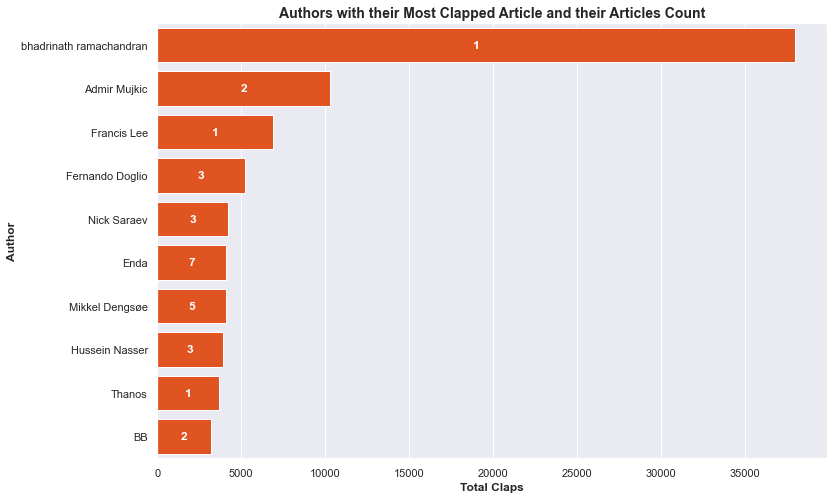

In [107]:
most_clapped = data.loc[data.groupby('author')['claps'].idxmax()]
author_stats = most_clapped.groupby('author').agg({'claps': 'sum'})
article_counts = data.groupby('author').size().rename('article_count')
# Join the two dataframes to get both claps and article count for each author
author_stats = author_stats.join(article_counts)
top_authors = author_stats.nlargest(10, 'claps')
top_authors = top_authors.sort_values(by='claps', ascending=False)

fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='claps', y=top_authors.index, data=top_authors, color='orangered')
for i, (claps, count) in enumerate(zip(top_authors['claps'], top_authors['article_count'])):
    ax.text(claps/2, i, f"{count}", ha='center', va='center', color='white', fontweight='bold')

plt.xlabel("Total Claps", fontweight='bold', fontsize=12)
plt.ylabel("Author", fontweight='bold', fontsize=12)
plt.title("Authors with their Most Clapped Article and their Articles Count", fontweight='bold', fontsize=14)

plt.show()



#### 4.4. How many average claps per article do the best authors receive?

Using average claps per article as a metric to measure authors can be effective in identifying those who consistently produce high-performing articles. However, this metric may not accurately reflect the quality of an author's work if they are a "one-hit-wonder" who writes a single, highly-clapped post and then stops writing. Despite this limitation, the top 1% of Medium authors still average an impressive 505 claps per article.

In [140]:
def plot_frequency(kde_data, clip=[0,8000],bw='scott',yvariable = "Article", xvariable = "claps", title = "Exceptional",shorten=False, claplocs=[], kclaps=[]):
    fig, ax = plt.subplots(figsize=(12, 6))

    sns.kdeplot(kde_data,bw_method=bw, fill=True, legend=False, clip=clip, color = "orangered", ax=ax)
    
    ninenine = kde_data.quantile(q=0.99)
    ax.axvline(x=ninenine, color="red")
    ax.axvspan(ninenine, clip[1], alpha=0.1, color='orange')
    ax.text(ninenine+(clip[1]-ninenine)*0.075,
            ax.get_yticks()[-1]/2.5,
            "Top 1% = "+str(int(ninenine))+ " "+xvariable+".",
            fontsize=14)

    ax.set_title(title, fontsize=15, fontweight='bold')
    ax.set_xlabel(xvariable.title(), fontsize=13, fontweight='bold')
    ax.set_ylabel("Frequency of "+yvariable.title(), fontsize=13, fontweight='bold')
    ax.set_yticks([])
    
    if shorten:
        ax.set_xticks(claplocs)
        ax.set_xticklabels(kclaps, fontsize=12)

    ax.set_xlim(1,clip[1])


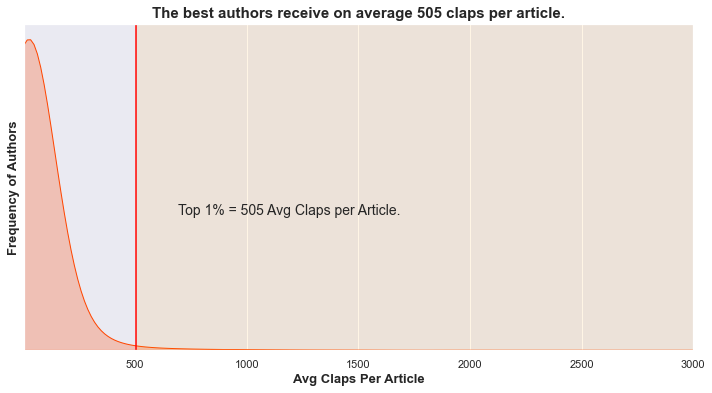

In [497]:
copy = data.copy()
copy["count"] = 1
authors_data = copy.groupby("author").sum()

authors_data["claps_ratio"] = authors_data['claps']/authors_data["count"]
claps_average = authors_data.sort_values("claps_ratio", ascending=False)[["claps_ratio", "count"]]

plot_frequency(claps_average.claps_ratio,
              clip=[0,3000],
               bw=0.4,
              yvariable = "Authors",
               xvariable="Avg Claps per Article",
              title="The best authors receive on average 505 claps per article.",
              shorten=False)

plt.show()

## 5. Analyzing publications

Publications play an important role in the Medium ecosystem, providing a platform for writers to showcase their work and reach a wider audience. In this section, we will analyze the publications included in our dataset and explore their characteristics. By examining the number of articles, readership engagement, topics covered, and trends over time, we can gain insights into the behavior and preferences of Medium readers and writers. This information can be useful for publishers, editors, and writers who want to optimize their content strategy and better understand their target audience.



We will focus on such questions:

- Which publications have published the most articles?
- Which publications receive the most claps?
- Which publications have the most authors?
- What is the avarage reading time of articles according to the publications?
- How many articles post most of publications?

#### 5.1. Which publications have published the most articles?

Here are the top 10 medium publications with the most articles posted.

Towards Data Science stands out as the clear leader among the publications in our dataset, with an impressive 2598 articles posted. This is significantly higher than the next highest publications, which posted only up to 1000 articles. 

This suggests that Towards Data Science has been highly successful in attracting and publishing a large volume of content related to data science and related topics. This may be due to a variety of factors, such as a dedicated team of writers and editors, a loyal audience of readers, or a well-defined content strategy that aligns with current trends in the field. 

But other factors such as engagement, quality, and relevance to the target audience should also be considered when evaluating the performance of a publication.

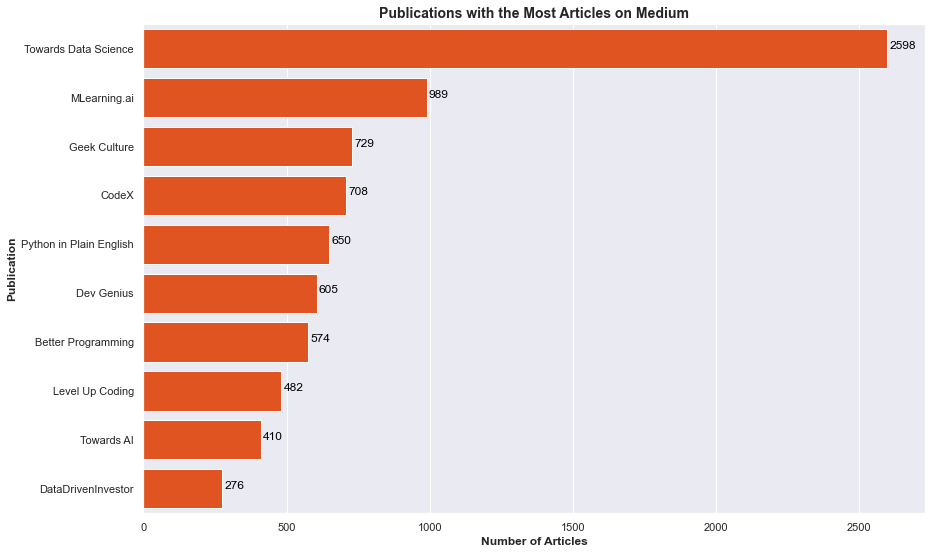

In [244]:
pub_counts = data['publication'].value_counts()
top_pubs = pub_counts.nlargest(10)

fig, ax = plt.subplots(figsize=(14, 9))
sns.barplot(x=top_pubs, y=top_pubs.index, color='orangered')

for i, v in enumerate(top_pubs):
    ax.text(v + 8, i, str(v), color='black', fontweight='normal')

plt.xlabel("Number of Articles", fontweight='bold', fontsize=12)
plt.ylabel("Publication", fontweight='bold', fontsize=12)
plt.title("Publications with the Most Articles on Medium", fontweight='bold', fontsize=14)

plt.show()

#### 5.2. Which publications receive the most claps and responses?

Below are the top 10 medium publications with the most total claps and responses received.

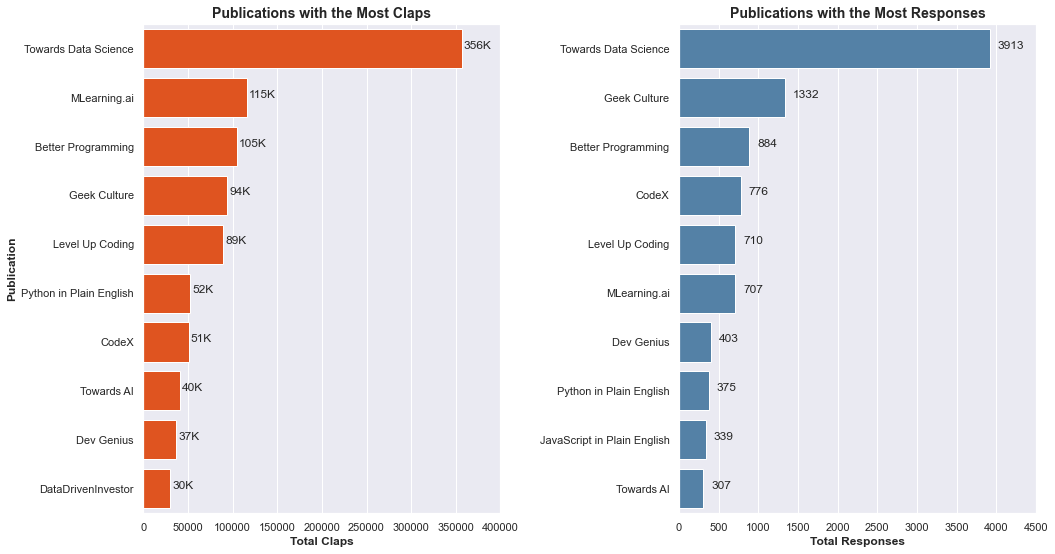

In [264]:
pubs_stats = data.groupby('publication').agg({'claps': 'sum', 'responses': 'sum'})
top_claps_pubs = pubs_stats.nlargest(10, 'claps')
top_responses_pubs = pubs_stats.nlargest(10, 'responses')

#Claps plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 9))
sns.barplot(x='claps', y=top_claps_pubs.index, data=top_claps_pubs, color='orangered', ax=ax1)

#Add numbers to the right of the bars
for i, v in enumerate(top_claps_pubs['claps']):
    ax1.text(v+2000, i, f'{v//1000}K', fontsize=12, fontweight='normal')    
    
ax1.set_xlabel("Total Claps", fontweight='bold', fontsize=12)
ax1.set_ylabel("Publication", fontweight='bold', fontsize=12)
ax1.set_title("Publications with the Most Claps", fontweight='bold', fontsize=14)
ax1.set_xticks(range(0, 400001, 50000))

#Responses plot
sns.barplot(x='responses', y=top_responses_pubs.index, data=top_responses_pubs, color='steelblue', ax=ax2)

for i, v in enumerate(top_responses_pubs['responses']):
    ax2.text(v+100, i, v, fontsize=12, fontweight='normal')

ax2.set_xlabel("Total Responses", fontweight='bold', fontsize=12)
ax2.set_ylabel("")
ax2.set_title("Publications with the Most Responses", fontweight='bold', fontsize=14)
ax2.set_xticks(range(0, 4501, 500))
fig.subplots_adjust(wspace=0.5)

plt.show()


The analysis of publications on Medium reveals that "Towards Data Science" is the Top 1 data science related publication with the highest number of articles, total claps, and responses. "MLearning.ai" follows with the second-highest number of articles and claps but falls sixth in terms of responses. "Geek Culture" ranks third in the number of articles and responses, and fourth in terms of claps.

It is noteworthy that "Better Programming" and "CodeX" persistently appear among the top five publications in all three categories. "Python in Plain English" and "Level Up Coding" also exhibit strong performance, placing in the top five in two out of the three categories.

Overall, the findings suggest that a publication's reputation and the quality of its articles play a critical role in its success on the platform. As a result, authors seeking to publish their work on Medium may want to consider submitting their articles to one of the leading publications to enhance their chances of reaching a wider audience and receiving greater engagement.

#### 5.3. What is the avarage reading time of articles according to the Top 10 publications?

As shown below, the most popular reading time in successfull publications is around 4-7 minutes.

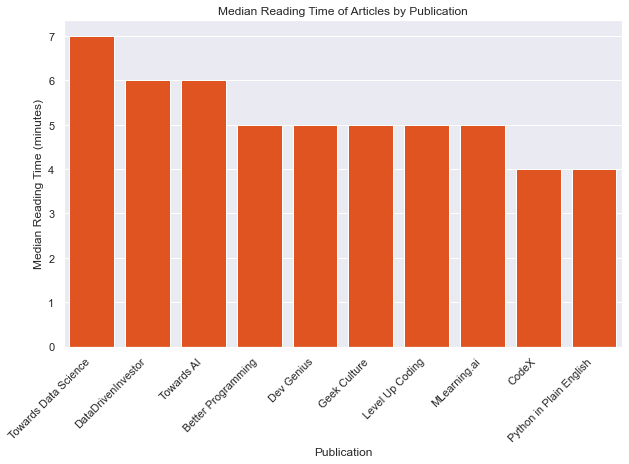

In [503]:
publications = ['Towards Data Science', 'MLearning.ai', 'Geek Culture', 'CodeX', 
                'Python in Plain English', 'Dev Genius', 'Better Programming', 
                'Level Up Coding', 'Towards AI', 'DataDrivenInvestor']

pub_filtered = data[data['publication'].isin(publications)]

avg_reading_time = pub_filtered.groupby('publication')['reading_time'].median().sort_values(ascending=False)[:10]

plt.figure(figsize=(10,6))
ax = sns.barplot(x=avg_reading_time.index, y=avg_reading_time.values, color='orangered')
ax.set_title('Median Reading Time of Articles by Publication')
ax.set_xlabel('Publication')
ax.set_ylabel('Median Reading Time (minutes)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()



#### 5.4. How many articles did the publications post?

Only 1% of publications have posted more than 57 articles. The majority of publications have posted only up to 25 articles in 2022.

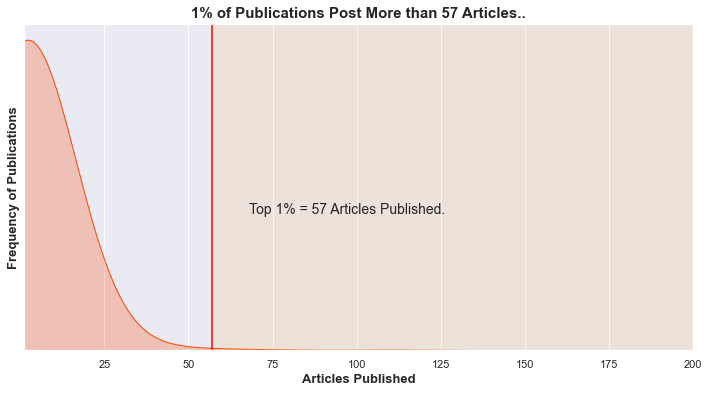

In [423]:
plot_frequency(data.publication.value_counts(),
              clip=[0,200],
              yvariable = "Publications",
               xvariable="Articles Published",
              title="1% of Publications Post More than 57 Articles..",
              shorten=False)

plt.show()

#### 5.5. Top 10 most average clapped publications

The fact that some publications have posted only a few articles that performed really well impacts the mean claps value. This is because it includes publications with a small number of articles but high engagement, leading to a high mean value. This is precisely the situation with the top 10 publications by mean claps, all of which posted only 1-5 articles in a year.

In [344]:
pub_claps = data.groupby('publication').agg({'claps': 'mean', "title": 'count'})
pub_claps = pub_claps.sort_values("claps", ascending=False)[["claps", "title"]]
pub_claps[:10]

,claps,title
publication,,
MIDFORM,3550.5,2
The Financial Journal,2600.0,1
Feedium,1980.0,1
Bits and Pieces,1630.2,5
Bicho Spills — Creativity and Languages,1411.5,2
Engage,1270.5,2
Debugger,1220.0,2
The Brain is a Noodle,1200.0,1
Writers Guild,1100.0,1


#### 5.6. Top 10 most average clapped publications (With total articles > 57)

Here, we have set a higher threshold by considering publications that have posted more than 57 articles in a year (99th percentile), to avoid the influence of low article count on the mean claps values. This allows us to focus on publications that have been consistently active in posting articles throughout the year and determine the top performers based on their mean claps values.

In [345]:
pub_claps_99 = pub_claps[pub_claps['title'] > 57].sort_values("claps", ascending=False)[["claps", "title"]]
pub_claps_99[:10]

,claps,title
publication,,
Predict,301.622951,61
ILLUMINATION,188.165138,109
Level Up Coding,185.948133,482
Better Programming,183.437282,574
JavaScript in Plain English,156.508475,118
Towards Data Science,137.294072,2598
Geek Culture,129.208505,729
Coders Mojo,117.527273,110
MLearning.ai,116.922144,989


## 6. Analyzing User Engagement Tendencies

Analyzing user engagement tendencies can give us valuable insights into how users interact with content on Medium. By looking at how users engage with articles, we can gain a better understanding of what types of content are most successful and how authors can improve their writing to increase engagement. In this section, we will explore various questions related to user engagement on Medium:

- Correlations between reading time, claps and responses for the most successful articles
- What are the most popular headline set of words?
- What headline set of words atract mo claps?
- Are question-titled articles more successful?

#### 6.1. Correlations between reading time, claps and responses for the most successful articles

The best articles (99th percentile) received 569 claps and more. Now let's see, how user engagement metrics are correlated for such articles.

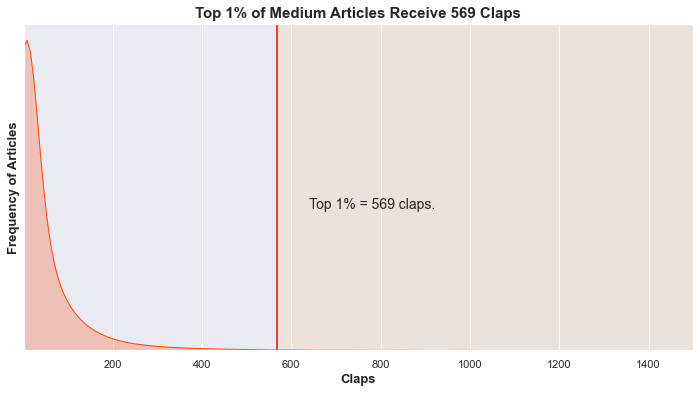

In [511]:
plot_frequency(data.claps,
              clip=[0,1500],
               yvariable="Articles",
               xvariable="claps",
              title="Top 1% of Medium Articles Receive 569 Claps",
               shorten=False)


plt.show()

There is a positive correlation between the number of claps and responses, indicating that articles that receive more claps tend to also receive more responses. However, the correlation coefficient is not particularly strong, indicating that this relationship is not deterministic.

Additionally, there is a weak negative correlation between the reading time and the number of claps, suggesting that articles with longer reading times tend to receive fewer claps. There is also a weak negative correlation between the reading time and the number of responses, indicating that articles with longer reading times tend to receive fewer responses.

In any case, it is important to keep in mind that these correlations do not necessarily imply causation, and there may be other factors at play that influence user engagement on Medium.

We can see on the heatmap the visualized correlations between the number of claps, responses, and reading time.

<AxesSubplot:>

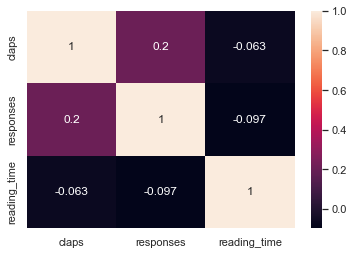

In [526]:
the_best = data[data['claps'] > 569]
sns.heatmap(the_best.corr(), annot = True)

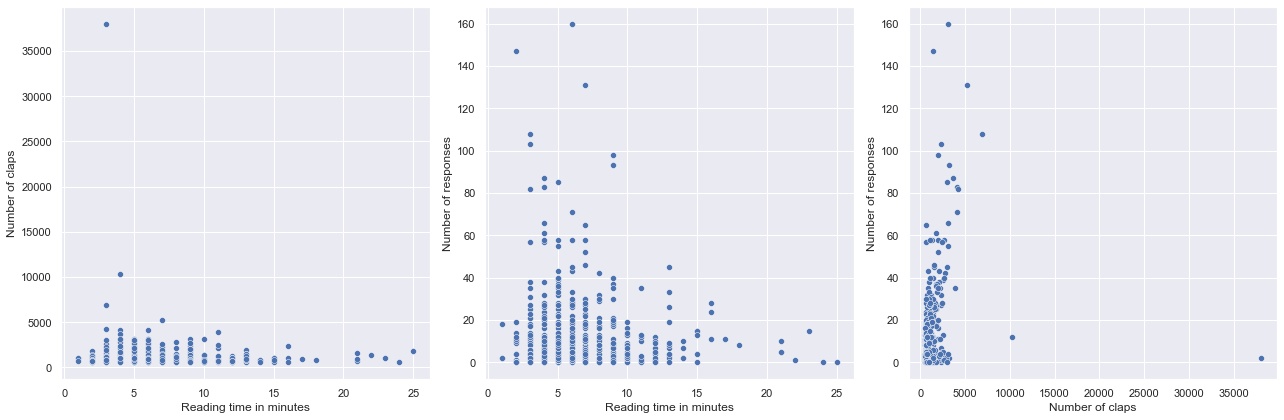

In [524]:
fig, axs = plt.subplots(ncols=3, figsize=(18,6))

# First subplot
sns.scatterplot(data=the_best, x="reading_time", y="claps", ax=axs[0])
axs[0].set_xlabel("Reading time in minutes")
axs[0].set_ylabel("Number of claps")

# Second subplot
sns.scatterplot(data=the_best, x="reading_time", y="responses", ax=axs[1])
axs[1].set_xlabel("Reading time in minutes")
axs[1].set_ylabel("Number of responses")

# Third subplot
sns.scatterplot(data=the_best, x="claps", y="responses", ax=axs[2])
axs[2].set_xlabel("Number of claps")
axs[2].set_ylabel("Number of responses")

plt.tight_layout()
plt.show()

#### 6.2. What are the most popular headline sets of words

The popularity of words and phrases is an important aspect of understanding what people are talking about and what topics are currently trending. By analyzing a large corpus of text data, we can identify the most frequently occurring word combinations, or sets of words, and gain insights into the prevailing themes and interests of a particular community or audience. 

On the plot below we see the popularity of sets of three Words in titles.

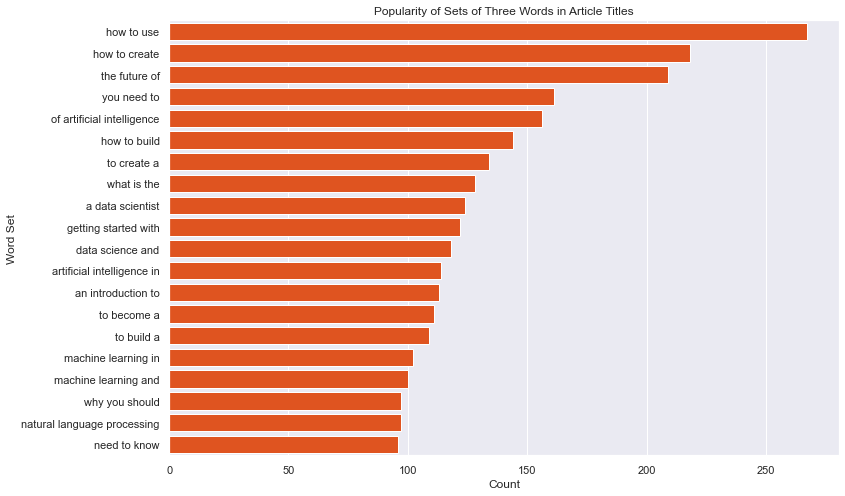

In [528]:
word_counts = {}

for title in data.title:
    # Split title into individual words and convert to lowercase
    words = [word.lower() for word in title.split(' ')]
    # If there are at least three words in the title
    if len(words) > 2:
        # Loop through all consecutive sets of three words
        for i in range(len(words) - 2):
            # Combine three consecutive words into a single string
            word_set = ' '.join(words[i:i+3])
            # If the word set is already in the dictionary, increment its count
            if word_set in word_counts:
                word_counts[word_set] += 1
            # Or add the word set to the dictionary with a count of 1
            else:
                word_counts[word_set] = 1

                
sorted_word_counts = pd.DataFrame(sorted(word_counts.items(), key=lambda x: x[1], reverse=True), 
                                  columns=['word_set', 'count'])

plt.figure(figsize=(12,8))
sns.barplot(x='count', y='word_set', data=sorted_word_counts.head(20), color = 'orangered')
plt.title('Popularity of Sets of Three Words in Article Titles')
plt.xlabel('Count')
plt.ylabel('Word Set')
plt.show()


#### 6.3. What sets of words gain more claps?

Based on the analysis of the top sets of 3 words and their mean claps, it can be concluded that topics related to data science, such as building, creating, and becoming a data scientist, time series forecasting, and machine learning, are the most popular among readers on the platform. It is interesting to note that sets of words that suggest learning and acquiring knowledge, such as "need to know" and "how to," also perform well in terms of claps. These findings can be useful for writers and publishers looking to optimize their content for maximum engagement on the platform.

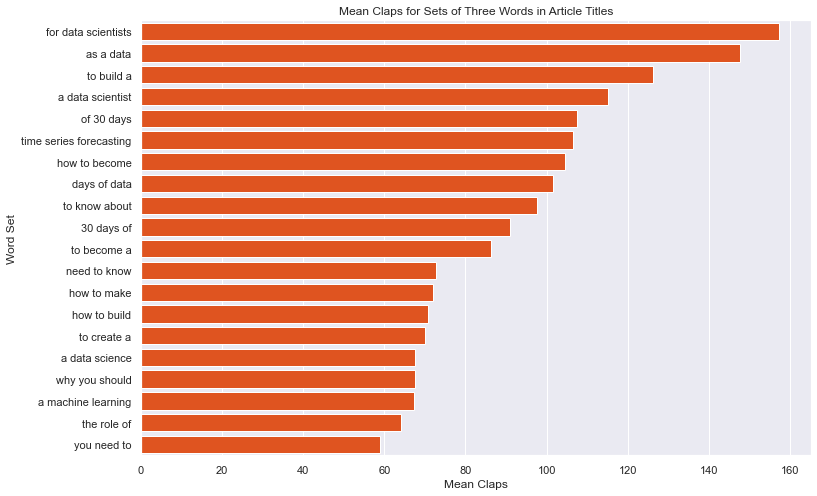

In [293]:
claps_by_word_set = {}

for i, row in data.iterrows():
    title = row['title']
    claps = row['claps']
    # Split title into individual words and convert them to lowercase
    words = [word.lower() for word in title.split(' ')]
    if len(words) > 2:
        for j in range(len(words) - 2):
            word_set = ' '.join(words[j:j+3])
            if word_set not in claps_by_word_set:
                claps_by_word_set[word_set] = [claps]
            else:
                claps_by_word_set[word_set].append(claps)

# Filter the word sets to only include those with more than 50 occurrences
claps_by_word_set = {k:v for k,v in claps_by_word_set.items() if len(v) >= 50}

# Calculate the mean number of claps for each word set and store the results in a dataframe
mean_claps_by_word_set = pd.DataFrame({
    'word_set': list(claps_by_word_set.keys()),
    'mean_claps': [sum(claps_by_word_set[word_set])/len(claps_by_word_set[word_set]) for word_set in claps_by_word_set]
})

mean_claps_by_word_set_sorted = mean_claps_by_word_set.sort_values(by='mean_claps', ascending=False).head(20)


plt.figure(figsize=(12,8))
sns.barplot(x='mean_claps', y='word_set', data=mean_claps_by_word_set_sorted, color='orangered')
plt.title('Mean Claps for Sets of Three Words in Article Titles')
plt.xlabel('Mean Claps')
plt.ylabel('Word Set')
plt.show()


#### 6.4. Are question-titled articles more successful?

I will conduct a hypothesis test to determine if articles with question headlines receive more claps than those without. I divided the data into two samples: 
1. Articles with question headlines.
2. Articles with non-question headlines. 

Alternative hypothesis (H1): Stories with questions as headlines have more claps than stories with non-question headlines.
Null hypothesis (H0): Stories with questions as headlines have the same or fewer claps than stories with non-question headlines.

The number of claps within each sample was modeled as independent and identically distributed random variables, with expected values μ1 and μ2 and variances σ21 and σ22, respectively.

In [545]:
question_words = ['What', 'Why', 'How', 'When', 'Which', 'Who', 
               'Whose', 'Whom', 'Do', 'Are', 'Is', 'Will',
               'Did', 'Can', 'Has', 'Should']

regex = '(('+('|'.join(question_words))+').*)|(.*\?)'

def like(x, pattern):
    pattern_re = re.compile(pattern)
    return [bool(pattern_re.fullmatch(val)) for val in x]

In [546]:
questions = data.loc[np.array(like(data['title'], regex)), ['title', 'claps']]
not_questions = data.loc[~np.array(like(data['title'], regex)), ['title', 'claps']]


In [547]:
questions

,title,claps
23,#2 Is Handwashing Effective?,0
80,#TechForNewbies: What does ‘open source’ mean?,1
99,(50% off) or (Buy one get one): Which one is m...,78
115,(Python)if__name__ == ‘__main__’ ??,3
122,(repost) If programming languages had honest t...,0
...,...,...
49526,데이터 분석은 왜 뜨는걸까?,0
49529,데이터베이스에서 클러스터(Cluster)란?,0
49561,음수의 % 및 / 알고리즘이 언어별로 다르다?,2
49638,😑 Exceptions are better than if/else statements?,6


In [548]:
not_questions

,title,claps
0,# 1 Python — String Interpolation,0
1,# 2 Rosalind Problems — Bioinformatics Strongh...,1
2,"# Series 11 Python Arrays, Classes & Inheritance",2
3,"#001: The Week In Stories — Tech Salaries, Fre...",106
4,"#003: The Week In Stories — React, Supabase, N...",21
...,...,...
49654,🧙🏼‍♂️ Lore AI Newsletter #3,37
49655,🧙🏼‍♂️ This Week in Generative AI #2,46
49656,🧪 How to test ML models? (1/n),8
49657,🧬 Intro to genetic algorithms with python,11


In [551]:
n = len(questions.index)
m = len(not_questions.index)
x_bar = questions['claps'].values.mean()
y_bar = not_questions['claps'].values.mean()
var1 = questions['claps'].values.var()
var2 = not_questions['claps'].values.var()

In [552]:
z = (x_bar - y_bar)/np.sqrt(var1/n + var2/m)
z

1.87612985875909

Finally, the p-value is:

In [554]:
p = 1 - norm.cdf(z)
p

0.03031872527045787

Based on our significance level of α= 0.05, we have found that the p-value is approximately 0.03, which is less than α. Therefore, we reject the null hypothesis and accept the alternative hypothesis. In other words, we can say with 95% confidence that articles with question headlines are expected to receive more claps than articles with non-question headlines.